In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('ENT_data.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x_____           131 non-null    int64  
 1   Jitter           131 non-null    float64
 2   Shimmer          131 non-null    float64
 3   GNE              131 non-null    float64
 4   Irregularity     131 non-null    float64
 5   Noise            131 non-null    float64
 6   OverallSeverity  131 non-null    float64
 7   mean_F0          131 non-null    float64
 8   SD_F0            131 non-null    float64
 9   Max_F0           131 non-null    float64
 10  Min_F0           131 non-null    float64
 11  Diagnosis        131 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
df.columns

Index(['x_____', 'Jitter', 'Shimmer', 'GNE', 'Irregularity', 'Noise',
       'OverallSeverity', 'mean_F0', 'SD_F0', 'Max_F0', 'Min_F0', 'Diagnosis'],
      dtype='object')

Jitter: Величина, характеризующая изменчивость основной частоты (F0) голоса во времени

Shimmer: Мера изменчивости амплитуды звукового сигнала голоса во времени

GNE: Голосовая нормализованная энтропия (GNE), мера сложности звукового сигнала голоса

Irregularity: Иррегулярность, связана с частотой

Noise: Уровень шума в голосовом сигнале

OverallSeverity: Общая степень тяжести

mean_F0: Средняя основная частота F0 голоса.

SD_F0: Стандартное отклонение основной частоты F0 голоса

Max_F0: Максимальная основная частота F0 голоса

Min_F0: Минимальная основная частота F0 голоса

Diagnosis: Диагноз

ЗАДАЧИ:

определение OverallSeverity(регрессия)

выявление диагноза(классификация)

In [ ]:
df.head()

,x_____,Jitter,Shimmer,GNE,Irregularity,Noise,OverallSeverity,mean_F0,SD_F0,Max_F0,Min_F0,Diagnosis
0,1,0.09,7.41,0.83,0.88,0.37,0.77,188.48,0.36,189.39,186.57,healthy
1,2,0.07,8.35,0.78,0.85,0.45,0.76,125.05,0.14,125.31,124.69,healthy
2,3,0.15,11.58,0.44,1.18,1.04,1.09,214.37,0.40,215.52,212.77,healthy
3,4,0.39,7.70,0.35,1.17,1.54,1.14,303.73,0.52,306.75,303.03,healthy
4,5,0.43,9.69,0.51,1.04,0.89,0.96,165.92,6.97,173.61,85.62,healthy


In [ ]:
df = df.drop(['x_____'], axis = 1)

In [ ]:
df['Diagnosis'].unique()

array(['healthy', 'Disphony', 'Paresis'], dtype=object)

In [ ]:
for index, row in df.iterrows():
  if row['Diagnosis']=='healthy':
    df.loc[index, 'Diagnosis'] = 0
  elif row['Diagnosis']=='Disphony':
    df.loc[index, 'Diagnosis'] = 1
  elif row['Diagnosis']=='Paresis':
    df.loc[index, 'Diagnosis'] = 2

In [ ]:
df['Diagnosis'].unique()

array([0, 1, 2], dtype=object)

In [ ]:
np.bincount(df["Diagnosis"])

array([30, 50, 51])

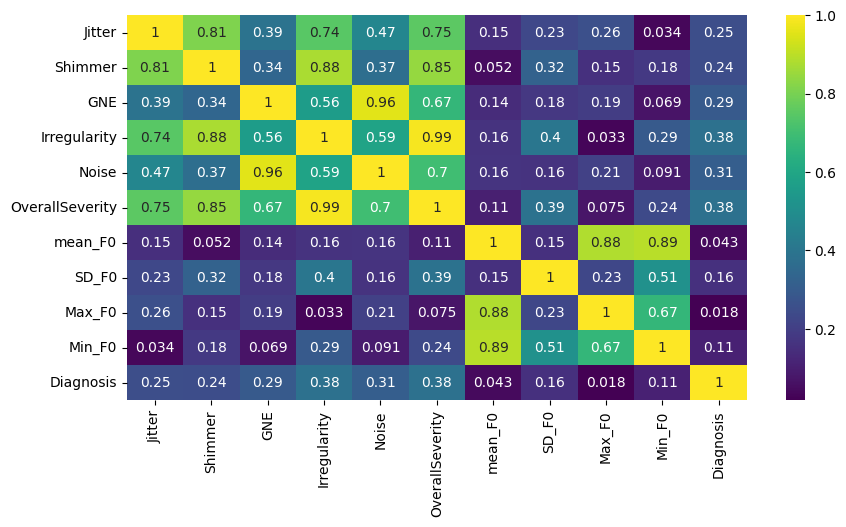

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(df.corr().abs(), cmap='viridis', annot = True)

In [ ]:
df.describe()

,Jitter,Shimmer,GNE,Irregularity,Noise,OverallSeverity,mean_F0,SD_F0,Max_F0,Min_F0
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.961450,13.820687,0.590458,1.340153,0.922366,1.206260,204.198092,5.388168,217.932061,185.949313
std,4.805058,9.608891,0.218107,0.500294,0.613509,0.464532,58.551715,9.553036,60.203629,69.395357
min,0.030000,2.700000,0.150000,0.500000,0.160000,0.470000,71.720000,-1.000000,72.050000,66.850000
25%,0.160000,8.265000,0.405000,0.980000,0.455000,0.875000,160.205000,0.520000,177.635000,127.070000
50%,0.310000,11.060000,0.610000,1.160000,0.730000,1.020000,199.320000,0.970000,215.520000,181.160000
75%,1.700000,16.320000,0.780000,1.670000,1.255000,1.485000,244.125000,2.700000,260.420000,237.535000
max,31.580000,62.420000,0.960000,2.790000,2.660000,2.600000,333.330000,48.810000,333.330000,333.330000


In [ ]:
df['Jitter_Shimmer'] = (df['Jitter'] + df['Shimmer']) / 2

In [ ]:
df = df.drop(['Jitter', 'Shimmer','Irregularity','Noise'], axis=1)

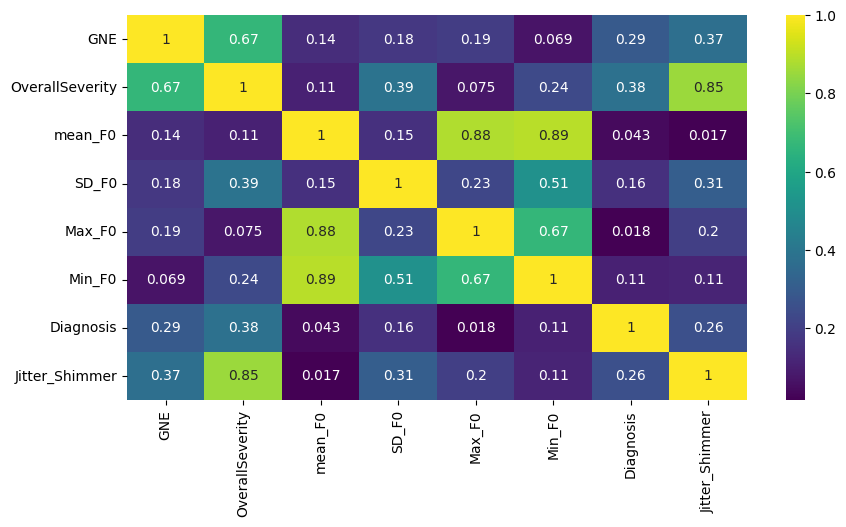

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(df.corr().abs(), cmap='viridis', annot = True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_absolute_error

from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Линейная регрессия

In [ ]:
X = df.drop(['OverallSeverity'], axis = 1)
y = df['OverallSeverity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

MAE: 0.11335498314511913
Значения при кросс-валидации(фолд = 3):
[0.77908234 0.88014266 0.81348717]


# SVM регрессия

In [ ]:
X = df.drop(['OverallSeverity'], axis = 1)
y = df['OverallSeverity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

MAE: 0.11511195279505908
Значения при кросс-валидации(фолд = 3):
[0.79603312 0.89638743 0.83076554]


# Логистическая регрессия

In [ ]:
for index, row in df.iterrows():
  if row['Diagnosis']==0:
    df.loc[index, 'Diagnosis'] = 'healthy'
  elif row['Diagnosis']==1:
    df.loc[index, 'Diagnosis'] = 'Disphony'
  elif row['Diagnosis']==2:
    df.loc[index, 'Diagnosis'] = 'Paresis'

In [ ]:
X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(y_test, y_pred, average=None)}')

matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatrix:\n{matrix}')


Accuracy = 0.65

F1: [0.6875     0.64516129 0.58823529]

Matrix:
[[11  5  1]
 [ 2 10  1]
 [ 2  3  5]]


# SVM классификация

In [ ]:
X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(y_test, y_pred, average=None)}')

matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatrix:\n{matrix}\n')


Accuracy = 0.675

F1: [0.70588235 0.64       0.66666667]

Matrix:
[[12  3  2]
 [ 3  8  2]
 [ 2  1  7]]



SVM немного лучше определяет диагноз

# **Работа с нейросеткой**

In [ ]:
pip install tensorflow

In [1046]:
import tensorflow as tf
from tensorflow.keras import layers

# Регрессия

In [ ]:
for index, row in df.iterrows():
  if row['Diagnosis']=='healthy':
    df.loc[index, 'Diagnosis'] = 0
  elif row['Diagnosis']=='Disphony':
    df.loc[index, 'Diagnosis'] = 1
  elif row['Diagnosis']=='Paresis':
    df.loc[index, 'Diagnosis'] = 2

In [ ]:
X = df.drop(['OverallSeverity'], axis = 1)
y = df['OverallSeverity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float64)

In [ ]:
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([

    tf.keras.layers.Dense(units=42, activation='tanh',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=42, activation='tanh'),
    tf.keras.layers.Dense(units=42, activation='tanh'),
    tf.keras.layers.Dense(units=42, activation='tanh'),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer='adam',loss='mae')

In [ ]:
loss=model.fit(X_train_tf, y_train_tf, epochs=300)

Epoch 1/300
3/3 [==============================] - 1s 6ms/step - loss: 0.7173
Epoch 2/300
3/3 [==============================] - 0s 7ms/step - loss: 0.4604
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 0.5017
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 0.3509
Epoch 5/300
3/3 [==============================] - 0s 5ms/step - loss: 0.3142
Epoch 6/300
3/3 [==============================] - 0s 5ms/step - loss: 0.3296
Epoch 7/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2912
Epoch 8/300
3/3 [==============================] - 0s 5ms/step - loss: 0.3006
Epoch 9/300
3/3 [==============================] - 0s 6ms/step - loss: 0.2868
Epoch 10/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2783
Epoch 11/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2735
Epoch 12/300
3/3 [==============================] - 0s 5ms/step - loss: 0.2620
Epoch 13/300
3/3 [==============================] - 0s 6ms/st

<Axes: >

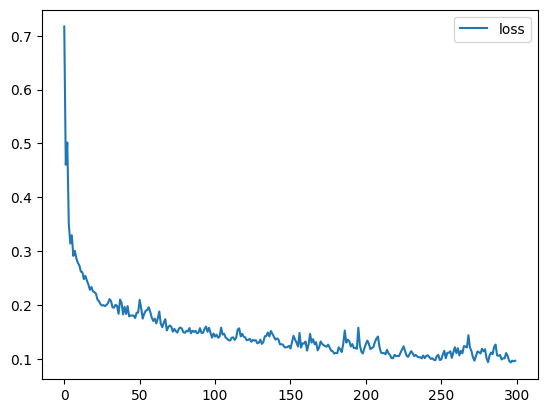

In [ ]:
loss_df = pd.DataFrame(loss.history)
loss_df.loc[:,['loss']].plot()

Нейросеть работает лучше(можно еще подобрать параметры, чтобы она работа лучше этого)

# Классификация

In [ ]:
X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float64)

In [ ]:
input_shape = (X_train.shape[1],)
basic_model = tf.keras.Sequential([

    tf.keras.layers.Dense(units=28, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=28, activation='tanh'),
    tf.keras.layers.Dense(units=28, activation='tanh'),
    tf.keras.layers.Dense(units=28, activation='tanh'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

In [ ]:
basic_model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
basic_model.fit(X_train_tf, y_train_tf, epochs=150)

Epoch 1/150
3/3 [==============================] - 1s 8ms/step - loss: 1.0895 - accuracy: 0.4066
Epoch 2/150
3/3 [==============================] - 0s 7ms/step - loss: 1.0617 - accuracy: 0.3736
Epoch 3/150
3/3 [==============================] - 0s 6ms/step - loss: 1.0720 - accuracy: 0.4066
Epoch 4/150
3/3 [==============================] - 0s 6ms/step - loss: 1.0462 - accuracy: 0.4176
Epoch 5/150
3/3 [==============================] - 0s 6ms/step - loss: 1.0575 - accuracy: 0.3626
Epoch 6/150
3/3 [==============================] - 0s 6ms/step - loss: 1.0686 - accuracy: 0.4286
Epoch 7/150
3/3 [==============================] - 0s 8ms/step - loss: 1.0439 - accuracy: 0.4396
Epoch 8/150
3/3 [==============================] - 0s 6ms/step - loss: 1.0531 - accuracy: 0.4176
Epoch 9/150
3/3 [==============================] - 0s 5ms/step - loss: 1.0460 - accuracy: 0.4396
Epoch 10/150
3/3 [==============================] - 0s 9ms/step - loss: 1.0424 - accuracy: 0.4286
Epoch 11/150
3/3 [===========

In [ ]:
X_test_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_test_tf = tf.convert_to_tensor(y_train, dtype=tf.float64)

In [ ]:
y_pred_probability = basic_model.predict(X_test_tf)
y_pred = np.argmax(y_pred_probability, axis=1)

accuracy = accuracy_score(y_test_tf, y_pred)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(y_test_tf, y_pred, average=None)}')

conf_mat = confusion_matrix(y_test_tf, y_pred)
print(f'\nMatrix:\n{conf_mat}\n')

3/3 [==============================] - 0s 6ms/step
Accuracy = 0.4945054945054945

F1: [0.57142857 0.35294118 0.53932584]

Matrix:
[[12  1  7]
 [ 4  9 20]
 [ 6  8 24]]



Получилось так, что нейросеть определяет диагноз хуже